### Create a Search Index and insert documents in the index:
- Search index will be created from the [index-schema.json](resource/index-schema.json) file
- documents are people names sourcing from [names.csv](resources/names.csv)

In [ ]:
from azuresearchclient import AzureSearchClient

AZURE = AzureSearchClient()
# Create Search Index
AZURE.create_index("test-index")
# insert documents into the search index (corrected spelled names)
AZURE.insert_documents("test-index")

### Query the search index by providing misspelled names and calculate the performance
- Create a set of all analyzers(fields)
- load misspelled names from [names-misspelled.csv](resources/names-misspelled.csv)
- load the expected names/results from [names-expected.csv](resources/names-expected.csv)
- for all elements in teh subset:
- send a query to the search index providing the missepelled name and target field
    - Mark the reponse (e.g. TP, TN, FP, FN)
    - Calculate the Precision, Recall and F1 score
- statistics will be stored in [generated](generated) directory

In [5]:
from constants import Constants
from statistics import Statistics

STATS = Statistics()
# target fields to be searched
FIELDS_SET = Constants.name_search_fields
all_subsets = STATS.utils.get_subsets(FIELDS_SET)
# list of correct names (already uploaded to the search index)
correct_list = STATS.utils.read_csv("names-expected.csv")
# list of misspelled names
misspelled_list = STATS.utils.read_csv("names-misspelled.csv")
# making queries (with misspelled names) and measure the result
STATS.calculate_statistics(correct_list, misspelled_list, all_subsets, AZURE, True)

### Plot the F1 score for each Analyzer

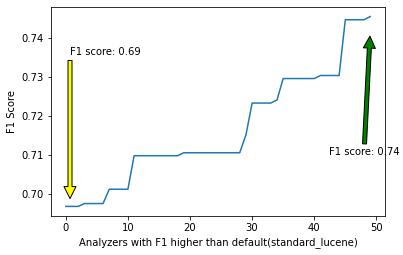

In [1]:
from statistics import Statistics

STATS = Statistics()
SCORES = STATS.generate_f1()
STATS.create_plot(SCORES)

### Experiment Result

Now consider that there is a name in our search index : **Tom O'halleran**

Our speech recognition or OCR extracted this text with an incorrect spelleing: **Tom O Halleran**

We are experimenting to disambiguate this name with two set ups:

- Default analyzer setup (**standard_lucene**)

- Analyzer with best performance set up (**camelcase,url_email,text_microsoft**)

#### Default analyzer experiment

In [1]:
from azuresearchclient import AzureSearchClient

AZURE = AzureSearchClient()
AZURE.make_search("Tom O Halleran", ["standard_lucene"])

{'queryType': 'full', 'search': 'Tom O Halleran', 'searchFields': 'standard_lucene'}
<Response [200]>


'Tom Canada'

#### Analyzer with best performance experiment

In [2]:
AZURE = AzureSearchClient()
AZURE.make_search("Tom O Halleran", ["camelcase", "url_email", "text_microsoft"])

{'queryType': 'full', 'search': 'Tom O Halleran', 'searchFields': 'camelcase,url_email,text_microsoft'}
<Response [200]>


"Tom O'halleran"

We can see that default setting was not successful to retrieve the most relevant result.